## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Dense, Input
from keras.models import Model
def build_mlp(input_dim, output_dim = 10, hidden_layer = [512, 256, 256, 128, 64]):
  input_layer = Input(input_dim)
  x = input_layer
  for neurons in hidden_layer:
    x = Dense(neurons, activation = 'relu')(x)
  out = Dense(output_dim, activation = 'softmax')(x)
  model = Model(input_layer, [out])
  return model

In [0]:
"""Code Here
設定超參數
"""
epochs = 50
batch_size = 128

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
import itertools
from keras.callbacks import ModelCheckpoint

Bool = [True, False]

results = {}
for i, (b1, b2) in enumerate(itertools.product(Bool, Bool)):
  keras.backend.clear_session()
  name = 'SaveBest:%r, SaveWeight:%r'%(b1, b2)
  checkpoint = ModelCheckpoint(monitor = 'val_loss', filepath="./tmp%d.h5"%i, 
                              save_best_only = True, save_weights_only=False)
  model = build_mlp(input_dim = x_train.shape[1:])
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
  model.summary()
  model.fit(x_train, y_train, validation_data = (x_test, y_test), 
            batch_size = batch_size, epochs = epochs, callbacks = [checkpoint], shuffle = True)

  acc = model.history.history['acc']
  val_acc = model.history.history['val_acc']
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']

  model = keras.models.load_model("./tmp%d.h5"%i)
  loss_load, acc_load = model.evaluate(x_test, y_test)

  results[name] = {
      'acc':acc,
      'val_acc':val_acc,
      'loss':loss,
      'val_loss': val_loss,
      'loss_load':loss_load,
      'acc_load':acc_load
  }








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)             

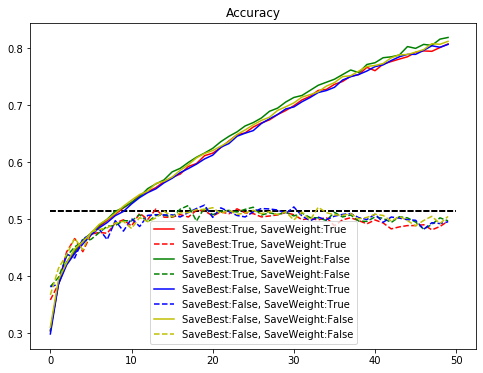

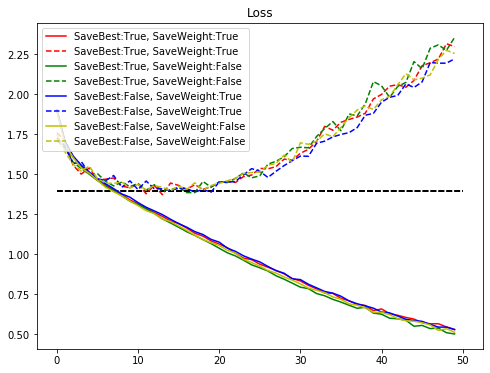

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'g', 'b', 'y', 'b']

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['acc'])), results[key]['acc'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_acc'])), results[key]['val_acc'], '--', color = colors[i], label = key)
  plt.hlines(y=acc_load, xmin=0, xmax=len(acc), colors='black', linestyles='--')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['loss'])), results[key]['loss'], '-', color = colors[i], label = key)
  plt.plot(range(len(results[key]['val_loss'])), results[key]['val_loss'], '--', color = colors[i], label = key)
  plt.hlines(y=loss_load, xmin=0, xmax=len(loss), colors='black', linestyles='--')
plt.title('Loss')
plt.legend()
plt.show()